In [1]:
!pip install git+https://github.com/twave-io/twave-api-client.git@0.1.1

from os import environ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from twave_client import TWaveClient

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

  Cloning https://github.com/twave-io/twave-api-client.git to /tmp/pip-req-build-hirbos1e
  Running command git clone --filter=blob:none --quiet https://github.com/twave-io/twave-api-client.git /tmp/pip-req-build-hirbos1e
  Resolved https://github.com/twave-io/twave-api-client.git to commit 8f8d7623da3e91d8a8b5d10d106d341cbfa3997a
  Preparing metadata (setup.py) ... done
  Created wheel for twave-api-client: filename=twave_api_client-0.1.0-py3-none-any.whl size=4340 sha256=cd1848f184c0ae40d5953fbbc6d2359cbe39c1ba0f4553aeed3806b7c9588236
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhglhy08/wheels/56/db/63/b3ac6eb8b94cc888ee0c3a6ed19b54f4d9a5f108bb587de60d
Successfully built twave-api-client
  Attempting uninstall: twave-api-client
    Found existing installation: twave-api-client 0.1.0
    Uninstalling twave-api-client-0.1.0:
      Successfully uninstalled twave-api-client-0.1.0
You should consider upgrading via the '/home/juan/.venvs/twave/bin/python -m pip install --upgrade pip'

## Accessing the TWave API

In [2]:
host = 'api.adif.twave.io'
token = environ['API_TOKEN']

api = TWaveClient(host, token)

## Listing assets

In [3]:
assets = api.list_assets()
print(assets)

['72vbdldzviH', 'F2iP3Xwec8G', 'IM2mkWVgGLl']


In [4]:
asset_id = 'IM2mkWVgGLl'

asset = api.get_asset(asset_id)
print(asset.name)

LP_Turbine


## Listing metrics

In [5]:
metrics = api.get_metrics(asset_id)
pd.DataFrame(metrics)

,id,asset_id,name,data_type,limit_min,limit_max,unit,enum_type
0,1IU0Xuh67pk,IM2mkWVgGLl,MAD32CY106.PF_2x_phase,float,-3.1416,3.1416,NaN,NaN
1,1J1CNjr7h3W,IM2mkWVgGLl,MAD32CY106.3_10x,float,0.0000,100.0000,NaN,NaN
2,1N0lNaJlPMv,IM2mkWVgGLl,MAD31CY005.3_10x,float,0.0000,1000.0000,NaN,NaN
3,1QSB7OthPJE,IM2mkWVgGLl,MAD32CY010.DC_Gap,float,-2000.0000,2000.0000,NaN,NaN
4,1TMdUaP6IEQ,IM2mkWVgGLl,MAD31CY105.HF_1_10kHz,float,0.0000,100.0000,NaN,NaN
...,...,...,...,...,...,...,...,...
123,Lm8nH5D3QDy,IM2mkWVgGLl,MAD31CY010.PH_2x_peak,float,0.0000,1000.0000,NaN,NaN
124,LutElqXFrN0,IM2mkWVgGLl,MAD32CY010.PH_2X_phase,float,-3.1416,3.1416,NaN,NaN
125,Lvx2WGoe4Bx,IM2mkWVgGLl,MAD31CY005.PH_2x_phase,float,-3.1416,3.1416,NaN,NaN
126,foDCLtSckE,IM2mkWVgGLl,load,float,NaN,NaN,G,NaN


## Plotting a trend

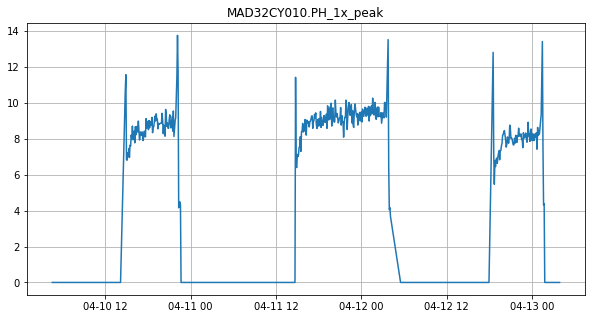

In [6]:
metric_id = '7PLJmFKUeWf'

trend = api.get_trend(asset_id, metric_id, window='5m')
t, y = trend.get_data()
t = np.array(t, dtype='datetime64[s]')
plt.plot(t, y)
plt.title(trend.meta.name)
plt.grid(True)

## Plotting a waveform

In [7]:
# list wave types
print(api.list_waves(asset_id))

['1UOd9kuewD2', '2ftd8tcCqa8', '4pvphOIf6Db', '8N6fGZLaaSQ', '8tmLjQLCSmI', '9pwymqgiFeJ', '9sYaSxIjarM', 'BEjcCQbMBTc', 'BQz15TwuQbQ', 'CIMuCiALPZx', 'EzvGSS7EOw7', 'G4tZ7zI1sup', 'GN5Q1cZFKn8', 'GYJvbMBw4nR', 'Glta4DlfxZ7', 'GwAfcaWI9Df', 'HUWVmQDzqpg', 'IwCCGzdt9Fg', 'Jpvy18FhZM0', 'KxN5lzYkMXU', 'fdiBj4aynO', 'u7YSy2ajWZ']


In [8]:
wave_id = 'CIMuCiALPZx'

t = api.list_wave_data(asset_id, wave_id, start=1554907772, stop=1554907832)
np.array(t, dtype='datetime64[s]')

array(['2019-04-10T14:49:32', '2019-04-10T14:49:36',
       '2019-04-10T14:50:12', '2019-04-10T14:50:16',
       '2019-04-10T14:50:20', '2019-04-10T14:50:24',
       '2019-04-10T14:50:28', '2019-04-10T14:50:32'],
      dtype='datetime64[s]')

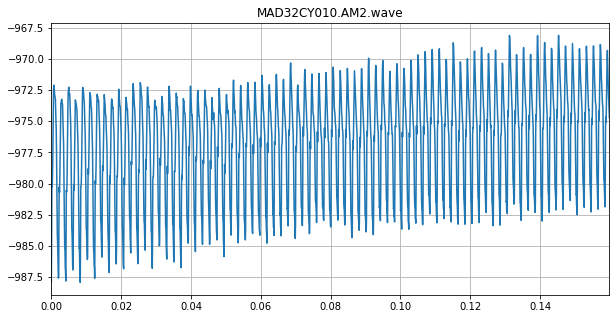

In [9]:
wf = api.get_wave(asset_id, wave_id, 1554907832)
plt.plot(*wf.get_data())
plt.title(wf.meta.name)
plt.xlim([0, wf.get_duration()])
plt.grid(True)

## Plotting a spectrum

In [10]:
# list spectra types
print(api.list_spectra(asset_id))

['11qP2UxV8Kn', '24Ou6OWqhfs', '2S5UGhrYvjw', '2tegDp4j5fo', '5Lgwxlvveew', '60IM7o52yZp', '61vIYoSKKJS', '6WI9CFiboSy', '86fNX8SZzOT', '8MxFhpIBMQl', '8YYruZkk0Jr', 'ArRD5ZAkOSU', 'Atuqer3GCRT', 'BK0SdSmmSKc', 'EMtOXPmpLqi', 'HDcnU2AOTvU', 'IcJirYmfW8y', 'J10Wk5PTnqw', 'J5S7gQyuCxj', 'JEZcwrR6tNe', 'L4jVc4NcGKK', 'UNULlQEh8K']


In [11]:
spec_id = '11qP2UxV8Kn'

t = api.list_spec_data(asset_id, spec_id, start=1554907772, stop=1554907832)
np.array(t, dtype='datetime64[s]')

array(['2019-04-10T14:49:32', '2019-04-10T14:49:36',
       '2019-04-10T14:50:12', '2019-04-10T14:50:16',
       '2019-04-10T14:50:20', '2019-04-10T14:50:24',
       '2019-04-10T14:50:28', '2019-04-10T14:50:32'],
      dtype='datetime64[s]')

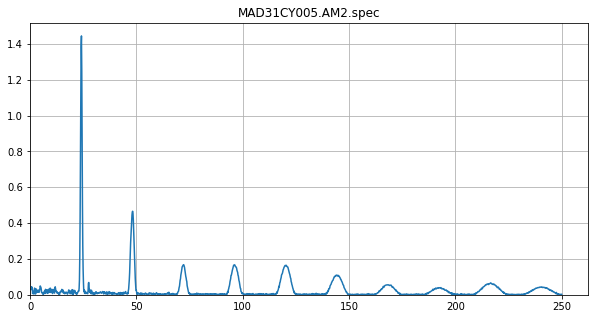

In [12]:
sp = api.get_spectrum(asset_id, spec_id, 1554907832)
plt.plot(*sp.get_data())
plt.title(sp.meta.name)
plt.xlim(0)
plt.ylim(0)
plt.grid(True)